# Simple Linear Regression

In this example we will consider price based on 'Area. Sq'

In this notebook, we'll build a linear regression model to predict "Price" Using "Area" as the predictor variable

# Understanding the Data

In [ ]:
# Importing data using the pandas library
import pandas as pd

In [ ]:
df_boston = pd.read_csv("/content/area_and_price.csv")

Now, let's check the structure of the boston house dataset.

In [ ]:
#Displaying the first 5 rows
df_boston.head()

,total_sqft,price
0,1056.0,39.07
1,2600.0,120.00
2,1440.0,62.00
3,1521.0,95.00
4,1200.0,51.00


In [ ]:
#Displaying the last 5 rows
df_boston.tail()

,total_sqft,price
13315,3453.0,231.0
13316,3600.0,400.0
13317,1141.0,60.0
13318,4689.0,488.0
13319,550.0,17.0


In [ ]:
# Let's Check the columns
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_sqft  13320 non-null  float64
 1   price       13320 non-null  float64
dtypes: float64(2)
memory usage: 208.2 KB


In [ ]:
# Check the shape of the DataFrame( Rows, Columns)
df_boston.shape

(13320, 2)

In [ ]:
# Let's Look at some statistical information about the dataframe.
df_boston.describe()

,total_sqft,price
count,13320.000000,13320.000000
mean,1559.626694,112.565627
std,1236.264860,148.971674
min,1.000000,8.000000
25%,1100.000000,50.000000
50%,1279.500000,72.000000
75%,1678.000000,120.000000
max,52272.000000,3600.000000


# Visualising Data Using Seaborn

In [ ]:
# conventional way to import seaborn
import matplotlib.pyplot as plt
import seaborn as sns

#to visualize in the notebook
%matplotlib inline

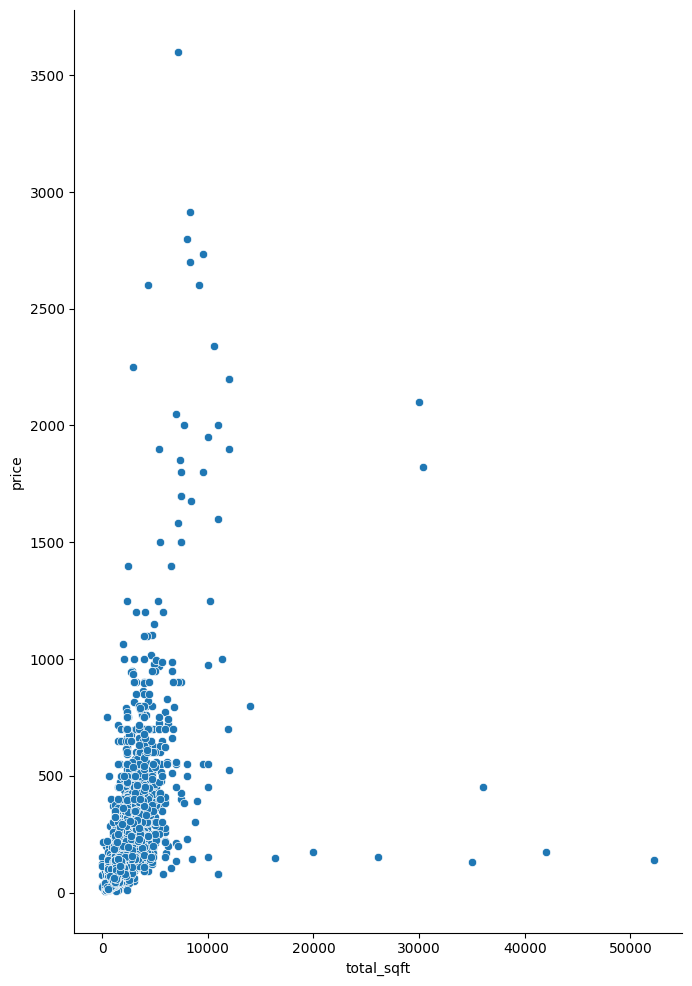

In [ ]:
# Visalize the relationship between the features and the response using scatterplots
sns.pairplot(df_boston, x_vars='total_sqft', y_vars='price', height = 10, aspect=0.7, kind='scatter')

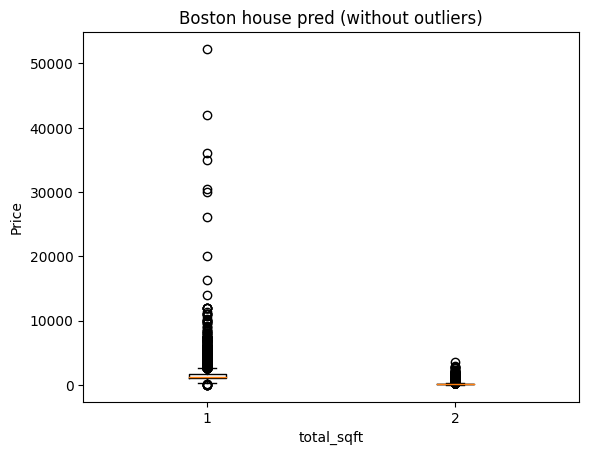

In [ ]:
# Create a boxplot without outliers
plt.boxplot(df_boston)

# Add labels and title
plt.xlabel("total_sqft")
plt.ylabel("Price")
plt.title("Boston house pred (without outliers)")

# Display the plot
plt.show()


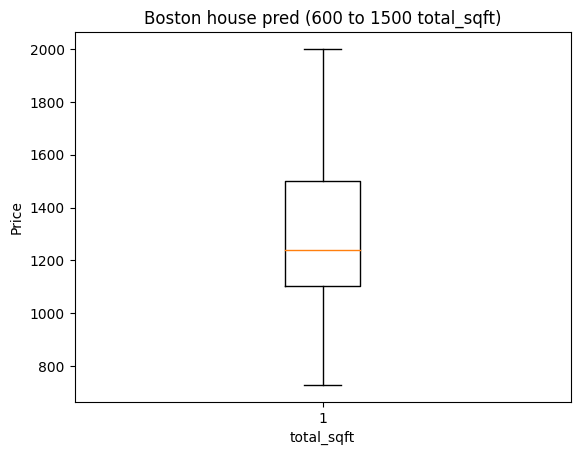

In [ ]:
# Assuming 'df_boston' is your DataFrame
# Filter the DataFrame to include only rows with 'total_sqft' values between 600 and 1500
df_filtered = df_boston[(df_boston['total_sqft'] >= 730) & (df_boston['total_sqft'] <= 2000)]

# Create a boxplot of the filtered data
plt.boxplot(df_filtered['total_sqft'])

# Add labels and title
plt.xlabel("total_sqft")
plt.ylabel("Price")
plt.title("Boston house pred (600 to 1500 total_sqft)")

# Display the plot
plt.show()


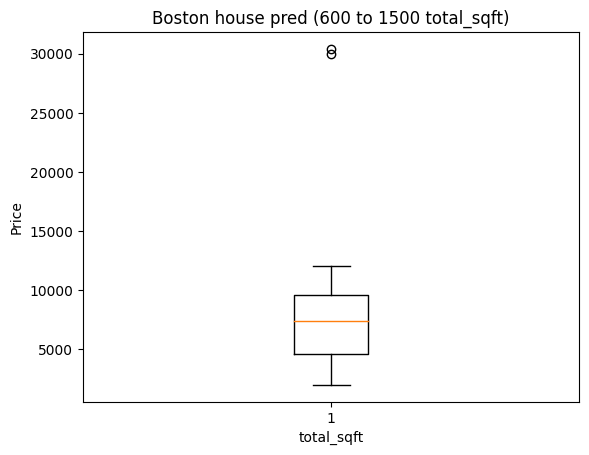

In [ ]:
# Assuming 'df_boston' is your DataFrame
# Filter the DataFrame to include only rows with 'total_sqft' values between 600 and 1500
df_filtered_price = df_boston[(df_boston['price'] >= 1000) & (df_boston['price'] <= 8000)]

# Create a boxplot of the filtered data
plt.boxplot(df_filtered_price['total_sqft'])

# Add labels and title
plt.xlabel("total_sqft")
plt.ylabel("Price")
plt.title("Boston house pred (600 to 1500 total_sqft)")

# Display the plot
plt.show()


In [ ]:
import numpy as np

# Assuming data is your array with mixed data types
# Filter and convert to float
numeric_data = [float(x) for x in df_boston if isinstance(x, (int, float))]

# Calculate percentiles for the filtered numeric_data
Q1 = np.percentile(numeric_data, 25)
Q3 = np.percentile(numeric_data, 75)

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = [x for x in numeric_data if x < lower_bound or x > upper_bound]

# Print the outliers
print("Outliers:", outliers)


IndexError: ignored

# Preparing X and y

In [ ]:
# putting feature variable to X
X = df_boston['total_sqft']

#print the first 5 rows
X.head()

In [ ]:
# putting response variable to y

y = df_boston['price']

#print the first 5 rows
y.head()

# Spliting Data into Training and Testing Sets

In [ ]:


# Import train_test_split from the correct module
from sklearn.model_selection import train_test_split

# Assuming X and y are defined earlier in your code
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)


In [ ]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

In [ ]:
train_test_split

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
import numpy as np

# Convert X_train and X_test to NumPy arrays if they are not already NumPy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)

# Now you can apply the [:, None] indexing
X_train = X_train[:, None]
X_test = X_test[:, None]


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# Performing Linear Regression

In [ ]:
# import Linear Regression From sklearn

from sklearn.linear_model import LinearRegression

# Representing LinearRegression as Lr(creating LinearRegression Object)
lr = LinearRegression()

# Fit the model using lr.fit()
lr.fit(X_train, y_train)

# Coefficients Calculations

In [ ]:
# Print the intercepts and Coefficients
print(lr.intercept_)
print(lr.coef_)

y = 11.6003 + 0.0648 x House Price

Now, Let's use the equation to predict our sales

# Predictions

In [ ]:
# Making predictions on the testing set
y_pred = lr.predict(X_test)

In [ ]:
type(y_pred)

Computing RMSE and R^2 Values

In [ ]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are NumPy arrays, make sure they have the same length
# You can slice them to have the same number of data points as 'c'
y_test = y_test[:len(c)]
y_pred = y_pred[:len(c)]

fig = plt.figure()
plt.plot(c, y_test, color='blue', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred, color='red', linewidth=2.5, linestyle='-')
fig.suptitle('Actual and Predicted', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('Price', fontsize=16)
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error , r2_score
mse = mean_squared_error(y_test, y_pred)

In [ ]:
r_squared = r2_score(y_test, y_pred)

In [ ]:
print('Mean_Squared_Error:', mse)
print('r_square_value:', r_squared)